In [72]:
import uproot
import numpy as np
import matplotlib as mp; import matplotlib.pyplot as plt; 
#reset matplotlib stle/parameters
import matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")
print(uproot.__version__)
import uproot3
print(uproot3.__version__)
import uproot3 as uproot
# import uproot
import argparse
import awkward
# update fonts
FONTSIZE = 14
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# set usetex = False if LaTex is not 
# available on your system or if the 
# rendering is too slow
mp.rc('text', usetex=True)

# set a seed to ensure reproducibility
seed = 128
rnd  = np.random.RandomState(seed)

4.3.4
3.14.4


In [42]:
ptbins=[97,  133,  174,  220,  272,  330,  395,  468,  548,  638,  737,  846, 967, 1101, 1248, 1410, 1588, 1784, 2000, 2238, 2500, 2787]

### We want to answer the question: what is a good event weight threshold?

In [43]:
def plt_weights(Weight_file, N):
    bins=100
    with uproot.open(Weight_file) as f:
        print('file keys', f.keys())
        tree=f['tree']
        print('tree keys', tree.keys())
        evweight_pre = tree.arrays('evtWeight', outputtype=tuple) 
        #yes doing below is comput. faster than converting the uproot to np
        w_min, w_max = np.array(evweight_pre).min(), np.array(evweight_pre).max()
        print('wmin, wmax = \t ', w_min,',\t', w_max)
        pTJet = tree.arrays('pTJet', outputtype=tuple)
        
        fig, ax = plt.subplots(1,2)
        if 'pre' in Weight_file: parton_or_hadron = 'parton'
        else: parton_or_hadron = 'hadron'
        ax[0].hist(evweight_pre, label='%s jets' % parton_or_hadron,bins=bins)
        ax[0].set_yscale('log')
        ax[0].set_title(r'CUEP8M1 $N_{events}$ = %s' % str(N))
        ax[0].set_xlabel(r'$w_{event}$')
        # ax[0].set_xlim(0,0.5)
        ax[0].legend()
        
        ax[1].hist(pTJet, label='%s jets $p_T$' % parton_or_hadron,bins=bins)
        ax[1].set_title('CUEP8M1')
        ax[1].set_xlabel(r'jet $p_T$')
        ax[1].legend()      
        
        plt.tight_layout(); plt.show()

file keys [b'tree;1']
tree keys [b'numJets', b'pTJet', b'evtWeight']
wmin, wmax = 	  1.0 ,	 1.0


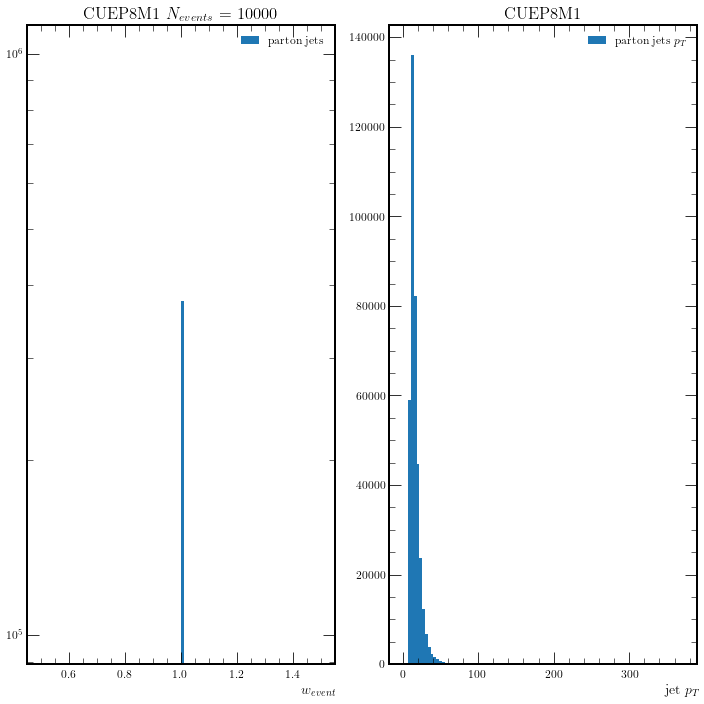

In [44]:
# w_file='WEIGHTS_post_10K_ParisParams.root'
# w_file='WEIGHTS_pre_10K_ParisParams.root'
w_file='unbiased/WEIGHTS_pre_100K_ParisParams_unbiased.root'
plt_weights(w_file, N=10000)

In [107]:
def hist_ax(ax, values, label, xlabel,xrange=None, yscale=None, xscale=None, ylabel=None, ax_title=None, alpha=1):
    ax.hist(values, label=label, alpha=alpha,bins=16); ax.legend(fontsize=23)
    ax.set_xlabel(xlabel,fontsize=25)
    if ax_title:
        ax.set_title(ax_title)
    if yscale:
        ax.set_yscale(yscale)
    if xscale:
        ax.set_xscale(xscale)
    if xrange:
        xmin, xmax = xrange
        ax.set_xlim(xmin,xmax)

def show_basic_info(values, label):
    #assuming uproot tuple values
    val_min, val_max = np.array(values).min(), np.array(values).max()
    print('\n %s_min, %s_max = \t ' % (label, label), val_min,',\t', val_max, '\n')
    shape = np.array(values).shape
    print('%s_shape = ' % label, shape) 
    
def get_centers(edges):
    return (edges[1:]+edges[:-1])/2

In [58]:
def plt_weights_two_files(filepre, filepost, N):
    with uproot.open(filepre) as filepre:
        with uproot.open(filepost) as filepost:
            print('file keys', filepre.keys())
            treepre = filepre["tree"]
            treepost = filepost["tree"]
            print()
            print('treepre keys',treepre.keys())
            print('treepost keys',treepost.keys())
            print()
            print('treepre["pTJet"] =',treepre["pTJet"])
    #         print()
    
            
            ptpre = treepre.arrays(["pTJet"], outputtype = tuple)
            ptpost = treepost.arrays(["pTJet"], outputtype = tuple)
            show_basic_info(ptpre, label='parton_jet_pT')
            
            evweight_pre = treepre.arrays('evtWeight', outputtype=tuple)
            evweight_post = treepost.arrays('evtWeight', outputtype=tuple) 
            show_basic_info(evweight_pre, label='parton_jet_event_weights')
            show_basic_info(evweight_post, label='hadron_jet_event_weights')


#             fig, ax = plt.subplots(1,2)
#             if 'pre' in Weight_file: parton_or_hadron = 'parton'
#             else: parton_or_hadron = 'hadron'
#             ax[0].hist(evweight_pre, label='%s jets' % parton_or_hadron,bins=bins)
#             ax[0].set_title(r'CUEP8M1 $N_{events}$ = %s' % str(N))
#             ax[0].set_xlabel(r'$w_{event}$')
#             # ax[0].set_xlim(0,0.5)
#             ax[0].legend()

#             ax[1].hist(pTJet, label='%s jets $p_T$' % parton_or_hadron,bins=bins)
#             ax[1].set_title('CUEP8M1')
#             ax[1].set_xlabel(r'jet $p_T$')
#             ax[1].legend()      


            fig, ax = plt.subplots(1,2)
            hist_ax(ax=ax[0], values=evweight_pre, label='parton jet', xlabel='event weight', alpha=0.35, yscale='log',xscale='log')
            hist_ax(ax=ax[0], values=evweight_post, label='hadron jet', xlabel='event weight', alpha=0.35, yscale='log',xscale='log')

            hist_ax(ax=ax[1], values=ptpre, label='parton jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log')
            hist_ax(ax=ax[1], values=ptpost, label='hadron jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log')
            evweight_pre=np.array(evweight_pre)
            print(len(evweight_pre[evweight_pre<0.00000001]))
            
            fig.suptitle(r'CUETP8M1, $N_{events}$ = %sK' % str(int(N/1000)), fontsize=22)
            plt.tight_layout(); plt.show()

file keys [b'tree;1']

treepre keys [b'numJets', b'pTJet', b'evtWeight']
treepost keys [b'numJets', b'pTJet', b'evtWeight']

treepre["pTJet"] = <TBranch b'pTJet' at 0x7fbf9d92b690>

 parton_jet_pT_min, parton_jet_pT_max = 	  0.0 ,	 3821.879067850399 

parton_jet_pT_shape =  (1, 691969)

 parton_jet_event_weights_min, parton_jet_event_weights_max = 	  1.8273135085853847e-11 ,	 0.998180472645993 

parton_jet_event_weights_shape =  (1, 691969)

 hadron_jet_event_weights_min, hadron_jet_event_weights_max = 	  2.5271318218963586e-11 ,	 0.992061155758257 

hadron_jet_event_weights_shape =  (1, 71765)
48294


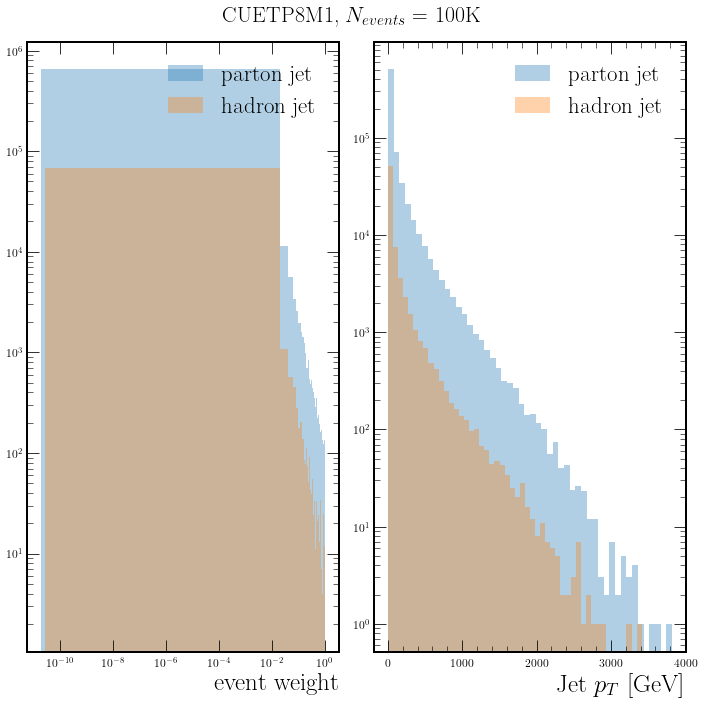

In [59]:
file_pre='biased/WEIGHTS_pre_10K_ParisParams.root'
file_post='biased/WEIGHTS_post_10K_ParisParams.root'
plt_weights_two_files(file_pre, file_post, N=100000)

In [118]:
def plt_weights_two_files_unbiased(filepre_nobias, filepost_nobias, filepre_withbias, filepost_withbias, N):
        with uproot.open(filepre_nobias) as filepre_nobias, uproot.open(filepost_nobias) as filepost_nobias, uproot.open(filepre_withbias) as filepre_withbias, uproot.open(filepost_withbias) as filepost_withbias:
            print('file keys', filepre_nobias.keys())
            treepre_nobias = filepre_nobias["tree"]
            treepost_nobias = filepost_nobias["tree"]
            
            treepre_withbias = filepre_withbias["tree"]
            treepost_withbias = filepost_withbias["tree"]
            print()
            print('treepre keys',treepre_nobias.keys())
            print('treepost keys',treepost_nobias.keys())
            print()
            print('treepre["pTJet"] =',treepre_nobias["pTJet"])
    #         print()

            #no bias
            ptpre_nobias = treepre_nobias.arrays(["pTJet"], outputtype = tuple)
            ptpost_nobias = treepost_nobias.arrays(["pTJet"], outputtype = tuple)
            show_basic_info(ptpre_nobias, label='parton_jet_pT_no_bias')

            evweight_pre_nobias = treepre_nobias.arrays('evtWeight', outputtype=tuple)
            evweight_post_nobias = treepost_nobias.arrays('evtWeight', outputtype=tuple) 
            show_basic_info(evweight_pre_nobias, label='parton_jet_event_weights_nobias')
            show_basic_info(evweight_post_nobias, label='hadron_jet_event_weights_nobias')

            #with bias
            ptpre_withbias = treepre_withbias.arrays(["pTJet"], outputtype = tuple)
            ptpost_withbias = treepost_withbias.arrays(["pTJet"], outputtype = tuple)
            show_basic_info(ptpre_withbias, label='parton_jet_pT_withbias')

            evweight_pre_withbias = treepre_withbias.arrays('evtWeight', outputtype=tuple)
            evweight_post_withbias = treepost_withbias.arrays('evtWeight', outputtype=tuple) 
            show_basic_info(evweight_pre_withbias, label='parton_jet_event_weights_withbias')
            show_basic_info(evweight_post_withbias, label='hadron_jet_event_weights_withbias')
            
            fig_height=10; fig_width=fig_height*1.33
            fig, ax = plt.subplots(2,2,figsize=(fig_width,fig_height))
            #no bias
            hist_ax(ax=ax[0,0], values=evweight_pre_nobias, label='parton jet', xlabel='event weight', alpha=0.35, yscale='log', ax_title='No bias, $N_{events}$ = %s K' % str(int(N/1000))) 
            hist_ax(ax=ax[0,0], values=evweight_post_nobias, label='hadron jet', xlabel='event weight', alpha=0.35, yscale='log',  ax_title='No bias, $N_{events}$ = %s K' % str(int(N/1000))) 

            hist_ax(ax=ax[0,1], values=ptpre_nobias, label='parton jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log', ax_title='No bias, $N_{events}$ = %s K' % str(int(N/1000)))
            hist_ax(ax=ax[0,1], values=ptpost_nobias, label='hadron jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log', ax_title='No bias, $N_{events}$ = %s K' % str(int(N/1000)))
            #with bias
            hist_ax(ax=ax[1,0], values=evweight_pre_withbias, label='parton jet', xlabel='event weight', alpha=0.35, yscale='log', ax_title='With bias, $N_{events}$ = %s K' % str(int(N/1000))) 
            hist_ax(ax=ax[1,0], values=evweight_post_withbias, label='hadron jet', xlabel='event weight', alpha=0.35, yscale='log',  ax_title='With bias, $N_{events}$ = %s K' % str(int(N/1000))) 

            hist_ax(ax=ax[1,1], values=ptpre_withbias, label='parton jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log', ax_title='With bias, $N_{events}$ = %s K' % str(int(N/1000)))
            hist_ax(ax=ax[1,1], values=ptpost_withbias, label='hadron jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log', ax_title='With bias, $N_{events}$ = %s K' % str(int(N/1000)))
            
            fig.suptitle(r'Pythia8; CUETP8M1',fontsize=26)
            plt.tight_layout(); 
            # plt.savefig('images/bias_nobias_weight_pt.png')
            plt.show()

file keys [b'tree;1']

treepre keys [b'numJets', b'pTJet', b'evtWeight']
treepost keys [b'numJets', b'pTJet', b'evtWeight']

treepre["pTJet"] = <TBranch b'pTJet' at 0x7fbf9dc7fa10>

 parton_jet_pT_no_bias_min, parton_jet_pT_no_bias_max = 	  0.0 ,	 371.03135458975487 

parton_jet_pT_no_bias_shape =  (1, 376243)

 parton_jet_event_weights_nobias_min, parton_jet_event_weights_nobias_max = 	  1.0 ,	 1.0 

parton_jet_event_weights_nobias_shape =  (1, 376243)

 hadron_jet_event_weights_nobias_min, hadron_jet_event_weights_nobias_max = 	  1.0 ,	 1.0 

hadron_jet_event_weights_nobias_shape =  (1, 403949)

 parton_jet_pT_withbias_min, parton_jet_pT_withbias_max = 	  0.0 ,	 3821.879067850399 

parton_jet_pT_withbias_shape =  (1, 691969)

 parton_jet_event_weights_withbias_min, parton_jet_event_weights_withbias_max = 	  1.8273135085853847e-11 ,	 0.998180472645993 

parton_jet_event_weights_withbias_shape =  (1, 691969)

 hadron_jet_event_weights_withbias_min, hadron_jet_event_weights_withbias_max

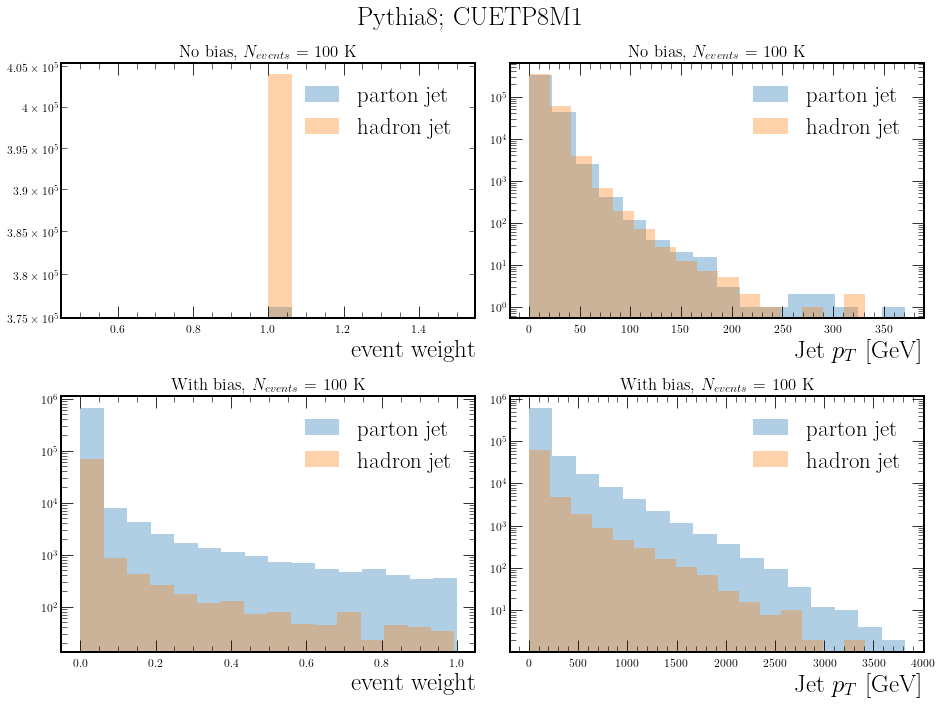

In [92]:
#signature: filepre_nobias, filepost_nobias, filepre_withbias, filepost_withbias
file_pre_biased='biased/WEIGHTS_pre_10K_ParisParams.root'
file_post_biased='biased/WEIGHTS_post_10K_ParisParams.root'

plt_weights_two_files_unbiased(filepre_nobias='unbiased/WEIGHTS_pre_100K_ParisParams_unbiased.root', filepost_nobias='unbiased/WEIGHTS_post_100K_ParisParams_unbiased.root', 
                    filepre_withbias=file_pre_biased, filepost_withbias=file_post_biased, N=100000)

file keys [b'tree;1']

treepre keys [b'numJets', b'pTJet', b'evtWeight']
treepost keys [b'numJets', b'pTJet', b'evtWeight']

treepre["pTJet"] = <TBranch b'pTJet' at 0x7fbf9f854c10>

 parton_jet_pT_no_bias_min, parton_jet_pT_no_bias_max = 	  0.0 ,	 137.1637607862249 

parton_jet_pT_no_bias_shape =  (1, 3786)

 parton_jet_event_weights_nobias_min, parton_jet_event_weights_nobias_max = 	  1.0 ,	 1.0 

parton_jet_event_weights_nobias_shape =  (1, 3786)

 hadron_jet_event_weights_nobias_min, hadron_jet_event_weights_nobias_max = 	  1.0 ,	 1.0 

hadron_jet_event_weights_nobias_shape =  (1, 4012)

 parton_jet_pT_withbias_min, parton_jet_pT_withbias_max = 	  0.0 ,	 2277.7765768883205 

parton_jet_pT_withbias_shape =  (1, 6965)

 parton_jet_event_weights_withbias_min, parton_jet_event_weights_withbias_max = 	  2.0054732472197606e-10 ,	 0.9280654550400511 

parton_jet_event_weights_withbias_shape =  (1, 6965)

 hadron_jet_event_weights_withbias_min, hadron_jet_event_weights_withbias_max = 	  2.5

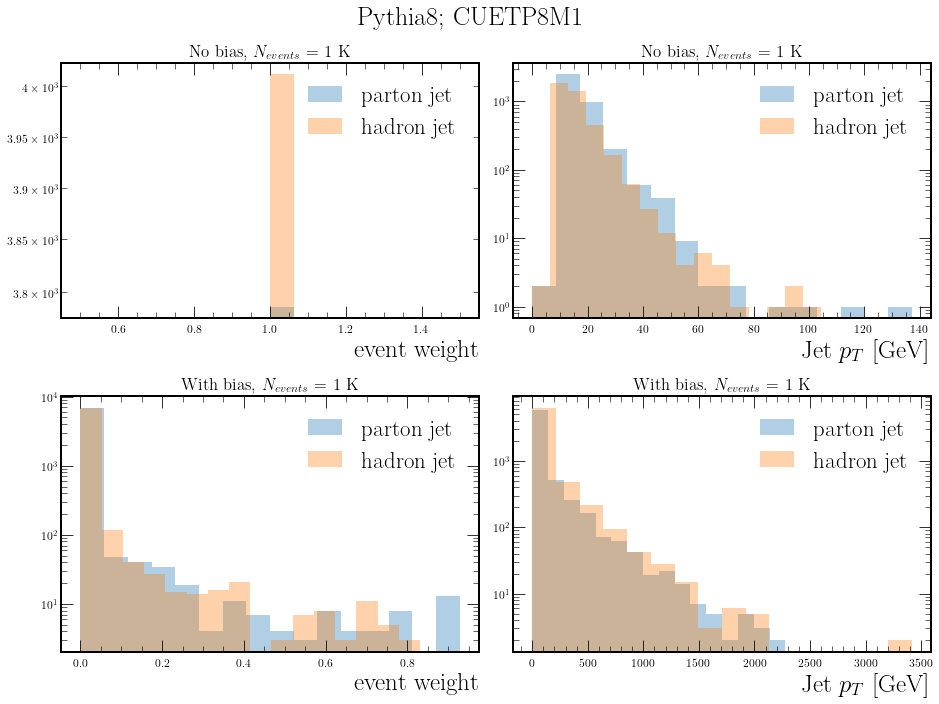

In [119]:
#signature: filepre_nobias, filepost_nobias, filepre_withbias, filepost_withbias
filepre_nobias='unbiased/pre/WEIGHTS_pre_1K_ParisParams_unbiased.root'
filepost_nobias='unbiased/post/WEIGHTS_post_1K_ParisParams_unbiased.root'


file_pre_biased='biased/pre/WEIGHTS_pre_1K_ParisParams_biased.root'
file_post_biased='biased/post/WEIGHTS_post_1K_ParisParams_biased.root'

plt_weights_two_files_unbiased(filepre_nobias=filepre_nobias, 
                               filepost_nobias=filepost_nobias, 
                    filepre_withbias=file_pre_biased, 
                               filepost_withbias=file_post_biased, 
                               N=1000)

In [138]:
def plt_2d_hist_two_files_unbiased(filepre_nobias, filepost_nobias, filepre_withbias, filepost_withbias, N):
        with uproot.open(filepre_nobias) as filepre_nobias, uproot.open(filepost_nobias) as filepost_nobias, uproot.open(filepre_withbias) as filepre_withbias, uproot.open(filepost_withbias) as filepost_withbias:
            print('file keys', filepre_nobias.keys())
            treepre_nobias = filepre_nobias["tree"]
            treepost_nobias = filepost_nobias["tree"]
            
            treepre_withbias = filepre_withbias["tree"]
            treepost_withbias = filepost_withbias["tree"]
            print()
            print('treepre keys',treepre_nobias.keys())
            print('treepost keys',treepost_nobias.keys())
            print()
            print('treepre["pTJet"] =',treepre_nobias["pTJet"])
    #         print()

            #no bias
            ptpre_nobias = treepre_nobias.arrays(["pTJet"], outputtype = tuple)
            ptpost_nobias = treepost_nobias.arrays(["pTJet"],outputtype = tuple)
            show_basic_info(ptpre_nobias, label='parton_jet_pT_no_bias')

            evweight_pre_nobias = treepre_nobias.arrays('evtWeight', outputtype=tuple)
            evweight_post_nobias = treepost_nobias.arrays('evtWeight', outputtype=tuple) 
            show_basic_info(evweight_pre_nobias, label='parton_jet_event_weights_nobias')
            show_basic_info(evweight_post_nobias, label='hadron_jet_event_weights_nobias')

            #with bias
            ptpre_withbias = treepre_withbias.arrays(["pTJet"], outputtype = tuple)
            ptpost_withbias = treepost_withbias.arrays(["pTJet"], outputtype = tuple)
            show_basic_info(ptpre_withbias, label='parton_jet_pT_withbias')

            evweight_pre_withbias = treepre_withbias.arrays('evtWeight', outputtype=tuple)
            evweight_post_withbias = treepost_withbias.arrays('evtWeight', outputtype=tuple) 
            show_basic_info(evweight_pre_withbias, label='parton_jet_event_weights_withbias')
            show_basic_info(evweight_post_withbias, label='hadron_jet_event_weights_withbias')
            
            fig_height=10; fig_width=fig_height*1.33
            fig, ax = plt.subplots(1,2,figsize=(fig_width,fig_height))
            #no bias hadron jet
            # X_nobias = np.array(evweight_pre_nobias).flatten()#weight
            W_nobias_post=np.array(evweight_post_nobias).flatten()
            PT_nobias_post = np.array(ptpost_nobias).flatten() #pt jet
            
#             H_2d, W_edges, pT_edges = np.histogram2d(W_nobias_post,PT_nobias_post, bins=(16,16) ) 
            
#             W_nobias_post=get_centers(W_edges)
#             PT_nobias_post = get_centers(pT_edges)
            
#             WEIGHT_nobias, PT_nobias = np.meshgrid(W_nobias_post,PT_nobias_post)
#             WEIGHT_nobias=WEIGHT_nobias.flatten()
#             PT_nobias=PT_nobias.flatten()
            
            # ax[0].hist2d(WEIGHT_nobias, PT_nobias, bins=(16,16), cmap='gist_earth_r')
            ax[0].hist2d(W_nobias_post, PT_nobias_post, cmap=plt.cm.jet)
            ax[0].set_xlabel('weight')
            ax[0].set_ylabel(r'$p_T^{hadron jet}$')
            ax[0].grid()
            ax[0].set_title('no bias')
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            ############################################################################################
            W_withbias_post=np.array(evweight_post_withbias).flatten()
            PT_withbias_post = np.array(ptpost_withbias).flatten() #pt jet
            
            # H_2d, W_edges, pT_edges = np.histogram2d(W_withbias_post,PT_withbias_post, bins=(16,16) ) 
            
#             W_withbias_post=get_centers(W_edges)
#             PT_withbias_post = get_centers(pT_edges)
            
#             WEIGHT_WITHBIAS, PT_WITHBIAS = np.meshgrid(W_withbias_post,PT_withbias_post)
#             WEIGHT_WITHBIAS=WEIGHT_WITHBIAS.flatten()
#             PT_WITHBIAS=PT_WITHBIAS.flatten()
                
            # ax[1].hist2d(WEIGHT_WITHBIAS, PT_WITHBIAS, bins=(16,16), cmap='gist_earth_r')
            ax[1].hist2d(W_withbias_post, PT_withbias_post, cmap=plt.cm.jet)
            ax[1].set_xlabel('weight')
            ax[1].set_ylabel(r'$p_T^{hadron jet}$')
            ax[1].grid()
            ax[0].set_title('with bias')
            
            
            
#             hist_ax(ax=ax[0,0], values=evweight_pre_nobias, label='parton jet', xlabel='event weight', alpha=0.35, yscale='log', ax_title='No bias, $N_{events}$ = %s K' % str(int(N/1000))) 
#             hist_ax(ax=ax[0,0], values=evweight_post_nobias, label='hadron jet', xlabel='event weight', alpha=0.35, yscale='log',  ax_title='No bias, $N_{events}$ = %s K' % str(int(N/1000))) 

#             hist_ax(ax=ax[0,1], values=ptpre_nobias, label='parton jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log', ax_title='No bias, $N_{events}$ = %s K' % str(int(N/1000)))
#             hist_ax(ax=ax[0,1], values=ptpost_nobias, label='hadron jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log', ax_title='No bias, $N_{events}$ = %s K' % str(int(N/1000)))
#             #with bias
#             hist_ax(ax=ax[1,0], values=evweight_pre_withbias, label='parton jet', xlabel='event weight', alpha=0.35, yscale='log', ax_title='With bias, $N_{events}$ = %s K' % str(int(N/1000))) 
#             hist_ax(ax=ax[1,0], values=evweight_post_withbias, label='hadron jet', xlabel='event weight', alpha=0.35, yscale='log',  ax_title='With bias, $N_{events}$ = %s K' % str(int(N/1000))) 

#             hist_ax(ax=ax[1,1], values=ptpre_withbias, label='parton jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log', ax_title='With bias, $N_{events}$ = %s K' % str(int(N/1000)))
#             hist_ax(ax=ax[1,1], values=ptpost_withbias, label='hadron jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log', ax_title='With bias, $N_{events}$ = %s K' % str(int(N/1000)))
            
            # fig.suptitle(r'Pythia8; CUETP8M1',fontsize=26)
            plt.tight_layout(); plt.show()

file keys [b'tree;1']

treepre keys [b'numJets', b'pTJet', b'evtWeight']
treepost keys [b'numJets', b'pTJet', b'evtWeight']

treepre["pTJet"] = <TBranch b'pTJet' at 0x7fbfa428d910>

 parton_jet_pT_no_bias_min, parton_jet_pT_no_bias_max = 	  0.0 ,	 137.1637607862249 

parton_jet_pT_no_bias_shape =  (1, 3786)

 parton_jet_event_weights_nobias_min, parton_jet_event_weights_nobias_max = 	  1.0 ,	 1.0 

parton_jet_event_weights_nobias_shape =  (1, 3786)

 hadron_jet_event_weights_nobias_min, hadron_jet_event_weights_nobias_max = 	  1.0 ,	 1.0 

hadron_jet_event_weights_nobias_shape =  (1, 4012)

 parton_jet_pT_withbias_min, parton_jet_pT_withbias_max = 	  0.0 ,	 2277.7765768883205 

parton_jet_pT_withbias_shape =  (1, 6965)

 parton_jet_event_weights_withbias_min, parton_jet_event_weights_withbias_max = 	  2.0054732472197606e-10 ,	 0.9280654550400511 

parton_jet_event_weights_withbias_shape =  (1, 6965)

 hadron_jet_event_weights_withbias_min, hadron_jet_event_weights_withbias_max = 	  2.5

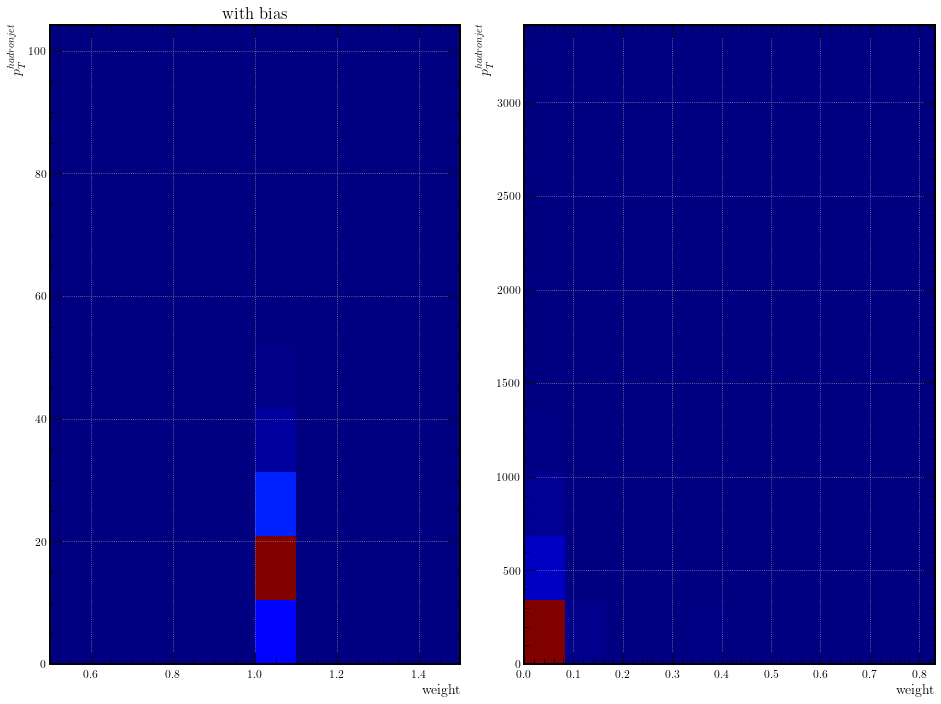

In [139]:
#signature: filepre_nobias, filepost_nobias, filepre_withbias, filepost_withbias
filepre_nobias='unbiased/pre/WEIGHTS_pre_1K_ParisParams_unbiased.root'
filepost_nobias='unbiased/post/WEIGHTS_post_1K_ParisParams_unbiased.root'


file_pre_biased='biased/pre/WEIGHTS_pre_1K_ParisParams_biased.root'
file_post_biased='biased/post/WEIGHTS_post_1K_ParisParams_biased.root'

plt_2d_hist_two_files_unbiased(filepre_nobias=filepre_nobias, 
                               filepost_nobias=filepost_nobias, 
                    filepre_withbias=file_pre_biased, 
                               filepost_withbias=file_post_biased, 
                               N=100000)

In [157]:
def transfer_matrix(filepre_nobias, filepost_nobias, filepre_withbias, filepost_withbias, N):
        with uproot.open(filepre_nobias) as filepre_nobias, uproot.open(filepost_nobias) as filepost_nobias, uproot.open(filepre_withbias) as filepre_withbias, uproot.open(filepost_withbias) as filepost_withbias:
            print('file keys', filepre_nobias.keys())
            treepre_nobias = filepre_nobias["tree"]
            treepost_nobias = filepost_nobias["tree"]
            
            treepre_withbias = filepre_withbias["tree"]
            treepost_withbias = filepost_withbias["tree"]
            print()
            print('treepre keys',treepre_nobias.keys())
            print('treepost keys',treepost_nobias.keys())
            print()
            print('treepre["pTJet"] =',treepre_nobias["pTJet"])
    #         print()

            #no bias
            ptpre_nobias = treepre_nobias.arrays(["pTJet"], outputtype = tuple)
            ptpost_nobias = treepost_nobias.arrays(["pTJet"],outputtype = tuple)
            show_basic_info(ptpre_nobias, label='parton_jet_pT_no_bias')

            evweight_pre_nobias = treepre_nobias.arrays('evtWeight', outputtype=tuple)
            evweight_post_nobias = treepost_nobias.arrays('evtWeight', outputtype=tuple) 
            show_basic_info(evweight_pre_nobias, label='parton_jet_event_weights_nobias')
            show_basic_info(evweight_post_nobias, label='hadron_jet_event_weights_nobias')

            #with bias
            ptpre_withbias = treepre_withbias.arrays(["pTJet"], outputtype = tuple)
            ptpost_withbias = treepost_withbias.arrays(["pTJet"], outputtype = tuple)
            show_basic_info(ptpre_withbias, label='parton_jet_pT_withbias')

            evweight_pre_withbias = treepre_withbias.arrays('evtWeight', outputtype=tuple)
            evweight_post_withbias = treepost_withbias.arrays('evtWeight', outputtype=tuple) 
            show_basic_info(evweight_pre_withbias, label='parton_jet_event_weights_withbias')
            show_basic_info(evweight_post_withbias, label='hadron_jet_event_weights_withbias')
            
            fig_height=10; fig_width=fig_height*1.33
            fig, ax = plt.subplots(1,1,figsize=(fig_width,fig_height))
            #no bias hadron jet
            # X_nobias = np.array(evweight_pre_nobias).flatten()#weight
            W_nobias_post=np.array(evweight_post_nobias).flatten()
            PT_nobias_post = np.array(ptpost_nobias).flatten() #pt jet
            
#             H_2d, W_edges, pT_edges = np.histogram2d(W_nobias_post,PT_nobias_post, bins=(16,16) ) 
            
#             W_nobias_post=get_centers(W_edges)
#             PT_nobias_post = get_centers(pT_edges)
            
#             WEIGHT_nobias, PT_nobias = np.meshgrid(W_nobias_post,PT_nobias_post)
#             WEIGHT_nobias=WEIGHT_nobias.flatten()
#             PT_nobias=PT_nobias.flatten()
            
            # ax[0].hist2d(WEIGHT_nobias, PT_nobias, bins=(16,16), cmap='gist_earth_r')
       
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            
            ############################################################################################
            W_withbias_post=np.array(evweight_post_withbias).flatten()
            PT_withbias_post = np.array(ptpost_withbias).flatten() #pt jet
            PT_withbias_pre = np.array(ptpre_withbias).flatten() #pt jet
            PT_withbias_post=PT_withbias_post[:len(PT_withbias_pre)]
            # H_2d, W_edges, pT_edges = np.histogram2d(W_withbias_post,PT_withbias_post, bins=(16,16) ) 
            
#             W_withbias_post=get_centers(W_edges)
#             PT_withbias_post = get_centers(pT_edges)
            
#             WEIGHT_WITHBIAS, PT_WITHBIAS = np.meshgrid(W_withbias_post,PT_withbias_post)
#             WEIGHT_WITHBIAS=WEIGHT_WITHBIAS.flatten()
#             PT_WITHBIAS=PT_WITHBIAS.flatten()
                
            # ax[1].hist2d(WEIGHT_WITHBIAS, PT_WITHBIAS, bins=(16,16), cmap='gist_earth_r')
            ax.hist2d(PT_withbias_pre, PT_withbias_post, bins=(4,4), cmap=plt.cm.jet)
            ax.set_xlabel(r'$p_T$ PS')
            ax.set_ylabel(r'$p_T$ PS+MPI+HAD' )
            ax.grid()
            ax.set_title('with bias')
            
            
            
#             hist_ax(ax=ax[0,0], values=evweight_pre_nobias, label='parton jet', xlabel='event weight', alpha=0.35, yscale='log', ax_title='No bias, $N_{events}$ = %s K' % str(int(N/1000))) 
#             hist_ax(ax=ax[0,0], values=evweight_post_nobias, label='hadron jet', xlabel='event weight', alpha=0.35, yscale='log',  ax_title='No bias, $N_{events}$ = %s K' % str(int(N/1000))) 

#             hist_ax(ax=ax[0,1], values=ptpre_nobias, label='parton jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log', ax_title='No bias, $N_{events}$ = %s K' % str(int(N/1000)))
#             hist_ax(ax=ax[0,1], values=ptpost_nobias, label='hadron jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log', ax_title='No bias, $N_{events}$ = %s K' % str(int(N/1000)))
#             #with bias
#             hist_ax(ax=ax[1,0], values=evweight_pre_withbias, label='parton jet', xlabel='event weight', alpha=0.35, yscale='log', ax_title='With bias, $N_{events}$ = %s K' % str(int(N/1000))) 
#             hist_ax(ax=ax[1,0], values=evweight_post_withbias, label='hadron jet', xlabel='event weight', alpha=0.35, yscale='log',  ax_title='With bias, $N_{events}$ = %s K' % str(int(N/1000))) 

#             hist_ax(ax=ax[1,1], values=ptpre_withbias, label='parton jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log', ax_title='With bias, $N_{events}$ = %s K' % str(int(N/1000)))
#             hist_ax(ax=ax[1,1], values=ptpost_withbias, label='hadron jet', xlabel=r'Jet $p_T$ [GeV]', alpha=0.35, yscale='log', ax_title='With bias, $N_{events}$ = %s K' % str(int(N/1000)))
            
            # fig.suptitle(r'Pythia8; CUETP8M1',fontsize=26)
            plt.tight_layout(); plt.show()

file keys [b'tree;1']

treepre keys [b'numJets', b'pTJet', b'evtWeight']
treepost keys [b'numJets', b'pTJet', b'evtWeight']

treepre["pTJet"] = <TBranch b'pTJet' at 0x7fbfa5a88790>

 parton_jet_pT_no_bias_min, parton_jet_pT_no_bias_max = 	  0.0 ,	 137.1637607862249 

parton_jet_pT_no_bias_shape =  (1, 3786)

 parton_jet_event_weights_nobias_min, parton_jet_event_weights_nobias_max = 	  1.0 ,	 1.0 

parton_jet_event_weights_nobias_shape =  (1, 3786)

 hadron_jet_event_weights_nobias_min, hadron_jet_event_weights_nobias_max = 	  1.0 ,	 1.0 

hadron_jet_event_weights_nobias_shape =  (1, 4012)

 parton_jet_pT_withbias_min, parton_jet_pT_withbias_max = 	  0.0 ,	 2277.7765768883205 

parton_jet_pT_withbias_shape =  (1, 6965)

 parton_jet_event_weights_withbias_min, parton_jet_event_weights_withbias_max = 	  2.0054732472197606e-10 ,	 0.9280654550400511 

parton_jet_event_weights_withbias_shape =  (1, 6965)

 hadron_jet_event_weights_withbias_min, hadron_jet_event_weights_withbias_max = 	  2.5

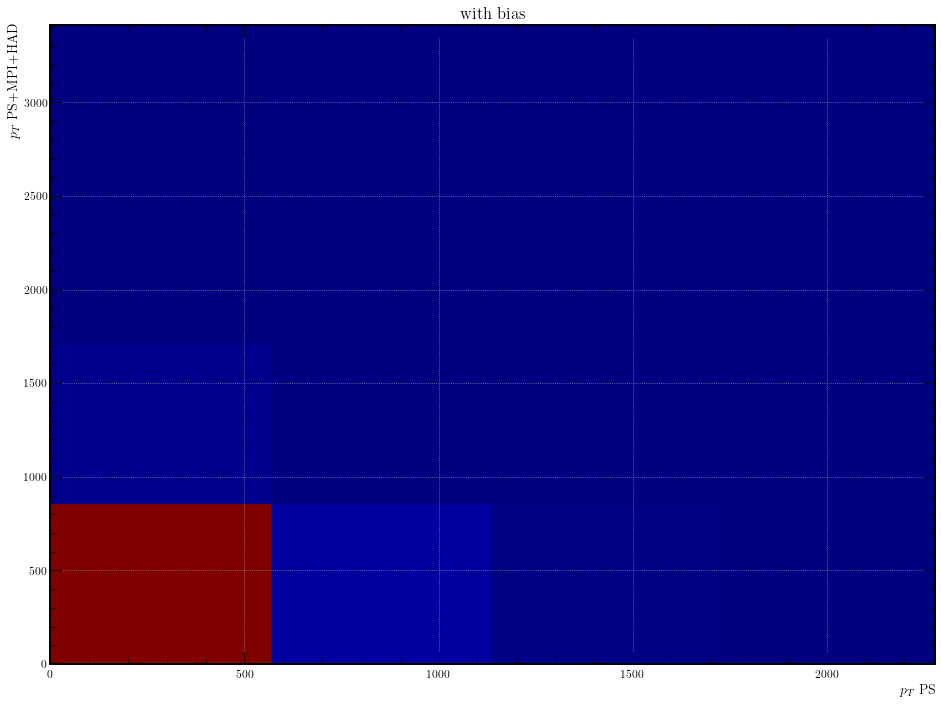

In [158]:
#signature: filepre_nobias, filepost_nobias, filepre_withbias, filepost_withbias
filepre_nobias='unbiased/pre/WEIGHTS_pre_1K_ParisParams_unbiased.root'
filepost_nobias='unbiased/post/WEIGHTS_post_1K_ParisParams_unbiased.root'


file_pre_biased='biased/pre/WEIGHTS_pre_1K_ParisParams_biased.root'
file_post_biased='biased/post/WEIGHTS_post_1K_ParisParams_biased.root'

transfer_matrix(filepre_nobias=filepre_nobias, 
                               filepost_nobias=filepost_nobias, 
                    filepre_withbias=file_pre_biased, 
                               filepost_withbias=file_post_biased, 
                               N=100000)